In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/genre-classification-dataset-imdb/Genre Classification Dataset/description.txt
/kaggle/input/genre-classification-dataset-imdb/Genre Classification Dataset/test_data_solution.txt
/kaggle/input/genre-classification-dataset-imdb/Genre Classification Dataset/test_data.txt
/kaggle/input/genre-classification-dataset-imdb/Genre Classification Dataset/train_data.txt


In [2]:
# Importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from wordcloud import WordCloud
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

from sklearn.model_selection import train_test_split

from sklearn.metrics import classification_report,confusion_matrix,ConfusionMatrixDisplay

In [3]:
import warnings

# Ignore all warnings
warnings.filterwarnings("ignore")

In [4]:
# Read data

train_data = pd.read_csv("/kaggle/input/genre-classification-dataset-imdb/Genre Classification Dataset/train_data.txt", delimiter=':::' ,header = None ,engine='python')
test_data  = pd.read_csv("/kaggle/input/genre-classification-dataset-imdb/Genre Classification Dataset/test_data.txt", delimiter=':::' ,header = None ,engine='python')

test_data_solution  = pd.read_csv("/kaggle/input/genre-classification-dataset-imdb/Genre Classification Dataset/test_data_solution.txt", delimiter=':::' ,header = None ,engine='python')

In [5]:
#view first 5 rows train data
train_data.head()

,0,1,2,3
0,1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...
1,2,Cupid (1997),thriller,A brother and sister with a past incestuous r...
2,3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...
3,4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...
4,5,The Unrecovered (2007),drama,The film's title refers not only to the un-re...


In [6]:
# check number of rows and columns of train data

train_data.shape

(54214, 4)

In [7]:
#view first 5 rows test data
test_data_solution.head()

,0,1,2,3
0,1,Edgar's Lunch (1998),thriller,"L.R. Brane loves his life - his car, his apar..."
1,2,La guerra de papá (1977),comedy,"Spain, March 1964: Quico is a very naughty ch..."
2,3,Off the Beaten Track (2010),documentary,One year in the life of Albin and his family ...
3,4,Meu Amigo Hindu (2015),drama,"His father has died, he hasn't spoken with hi..."
4,5,Er nu zhai (1955),drama,Before he was known internationally as a mart...


In [8]:
# check number of rows and columns of test data

test_data_solution.shape

(54200, 4)

In [9]:
# to get infomation about the  train data
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54214 entries, 0 to 54213
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       54214 non-null  int64 
 1   1       54214 non-null  object
 2   2       54214 non-null  object
 3   3       54214 non-null  object
dtypes: int64(1), object(3)
memory usage: 1.7+ MB


In [10]:
# to get infomation about the test data
test_data_solution.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54200 entries, 0 to 54199
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       54200 non-null  int64 
 1   1       54200 non-null  object
 2   2       54200 non-null  object
 3   3       54200 non-null  object
dtypes: int64(1), object(3)
memory usage: 1.7+ MB


In [11]:
# We will concat the test and train file
df = pd.concat((train_data ,test_data_solution))
df.columns = ["id" ,"Name","Genre","Description"]

In [12]:
#view first 5 rows data
df.head()

,id,Name,Genre,Description
0,1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...
1,2,Cupid (1997),thriller,A brother and sister with a past incestuous r...
2,3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...
3,4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...
4,5,The Unrecovered (2007),drama,The film's title refers not only to the un-re...


# #preprocessing

In [13]:
# check number of rows and columns of data
df.shape

(108414, 4)

In [14]:
# to get infomation about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 108414 entries, 0 to 54199
Data columns (total 4 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   id           108414 non-null  int64 
 1   Name         108414 non-null  object
 2   Genre        108414 non-null  object
 3   Description  108414 non-null  object
dtypes: int64(1), object(3)
memory usage: 4.1+ MB


In [15]:
# checking missing values
df.isnull().sum()

id             0
Name           0
Genre          0
Description    0
dtype: int64

In [16]:
## Check for Duplicates and Remove 
df.duplicated().sum() 
df.drop_duplicates(inplace = True)  

In [17]:
## function to preprocess the data
stopword = set(stopwords.words('english'))

def preprocessing(text):
    # Convert text to lowercase
    text = text.lower()
    
    # Remove punctuation using regular expressions
    text = re.sub(r'[^\w\s]', '', text)
    
    # Remove specific characters #, @, and $
    text = re.sub(r'[#@\$]', '', text)
    
    # tokenize and convert to list
    tokens = word_tokenize(text)
    
    ## Lemmatize it 
    lemmatizer  = WordNetLemmatizer()
    
    ## lemmatize each token
   # text = [lemmatizer.lemmatize(token) for token in tokens]
    text = text.split()
    
    text = [word for word in text if word not in stopword]
    
    
    return " ".join(text) 

In [18]:
# Create list of words in discription column
df["Despcription_processing"] =  df["Description"].apply(preprocessing)

In [19]:
df.head()

,id,Name,Genre,Description,Despcription_processing
0,1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...,listening conversation doctor parents 10yearol...
1,2,Cupid (1997),thriller,A brother and sister with a past incestuous r...,brother sister past incestuous relationship cu...
2,3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...,bus empties students field trip museum natural...
3,4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...,help unemployed father make ends meet edith tw...
4,5,The Unrecovered (2007),drama,The film's title refers not only to the un-re...,films title refers unrecovered bodies ground z...


# #Data Visualization

In [20]:
## Shows us the label counts
df["Genre"].value_counts()

Genre
 drama           27225
 documentary     26192
 comedy          14893
 short           10145
 horror           4408
 thriller         3181
 action           2629
 western          2064
 reality-tv       1767
 family           1567
 adventure        1550
 music            1462
 romance          1344
 sci-fi           1293
 adult            1180
 crime            1010
 animation         996
 sport             863
 talk-show         782
 fantasy           645
 mystery           637
 musical           553
 biography         529
 history           486
 game-show         387
 news              362
 war               264
Name: count, dtype: int64

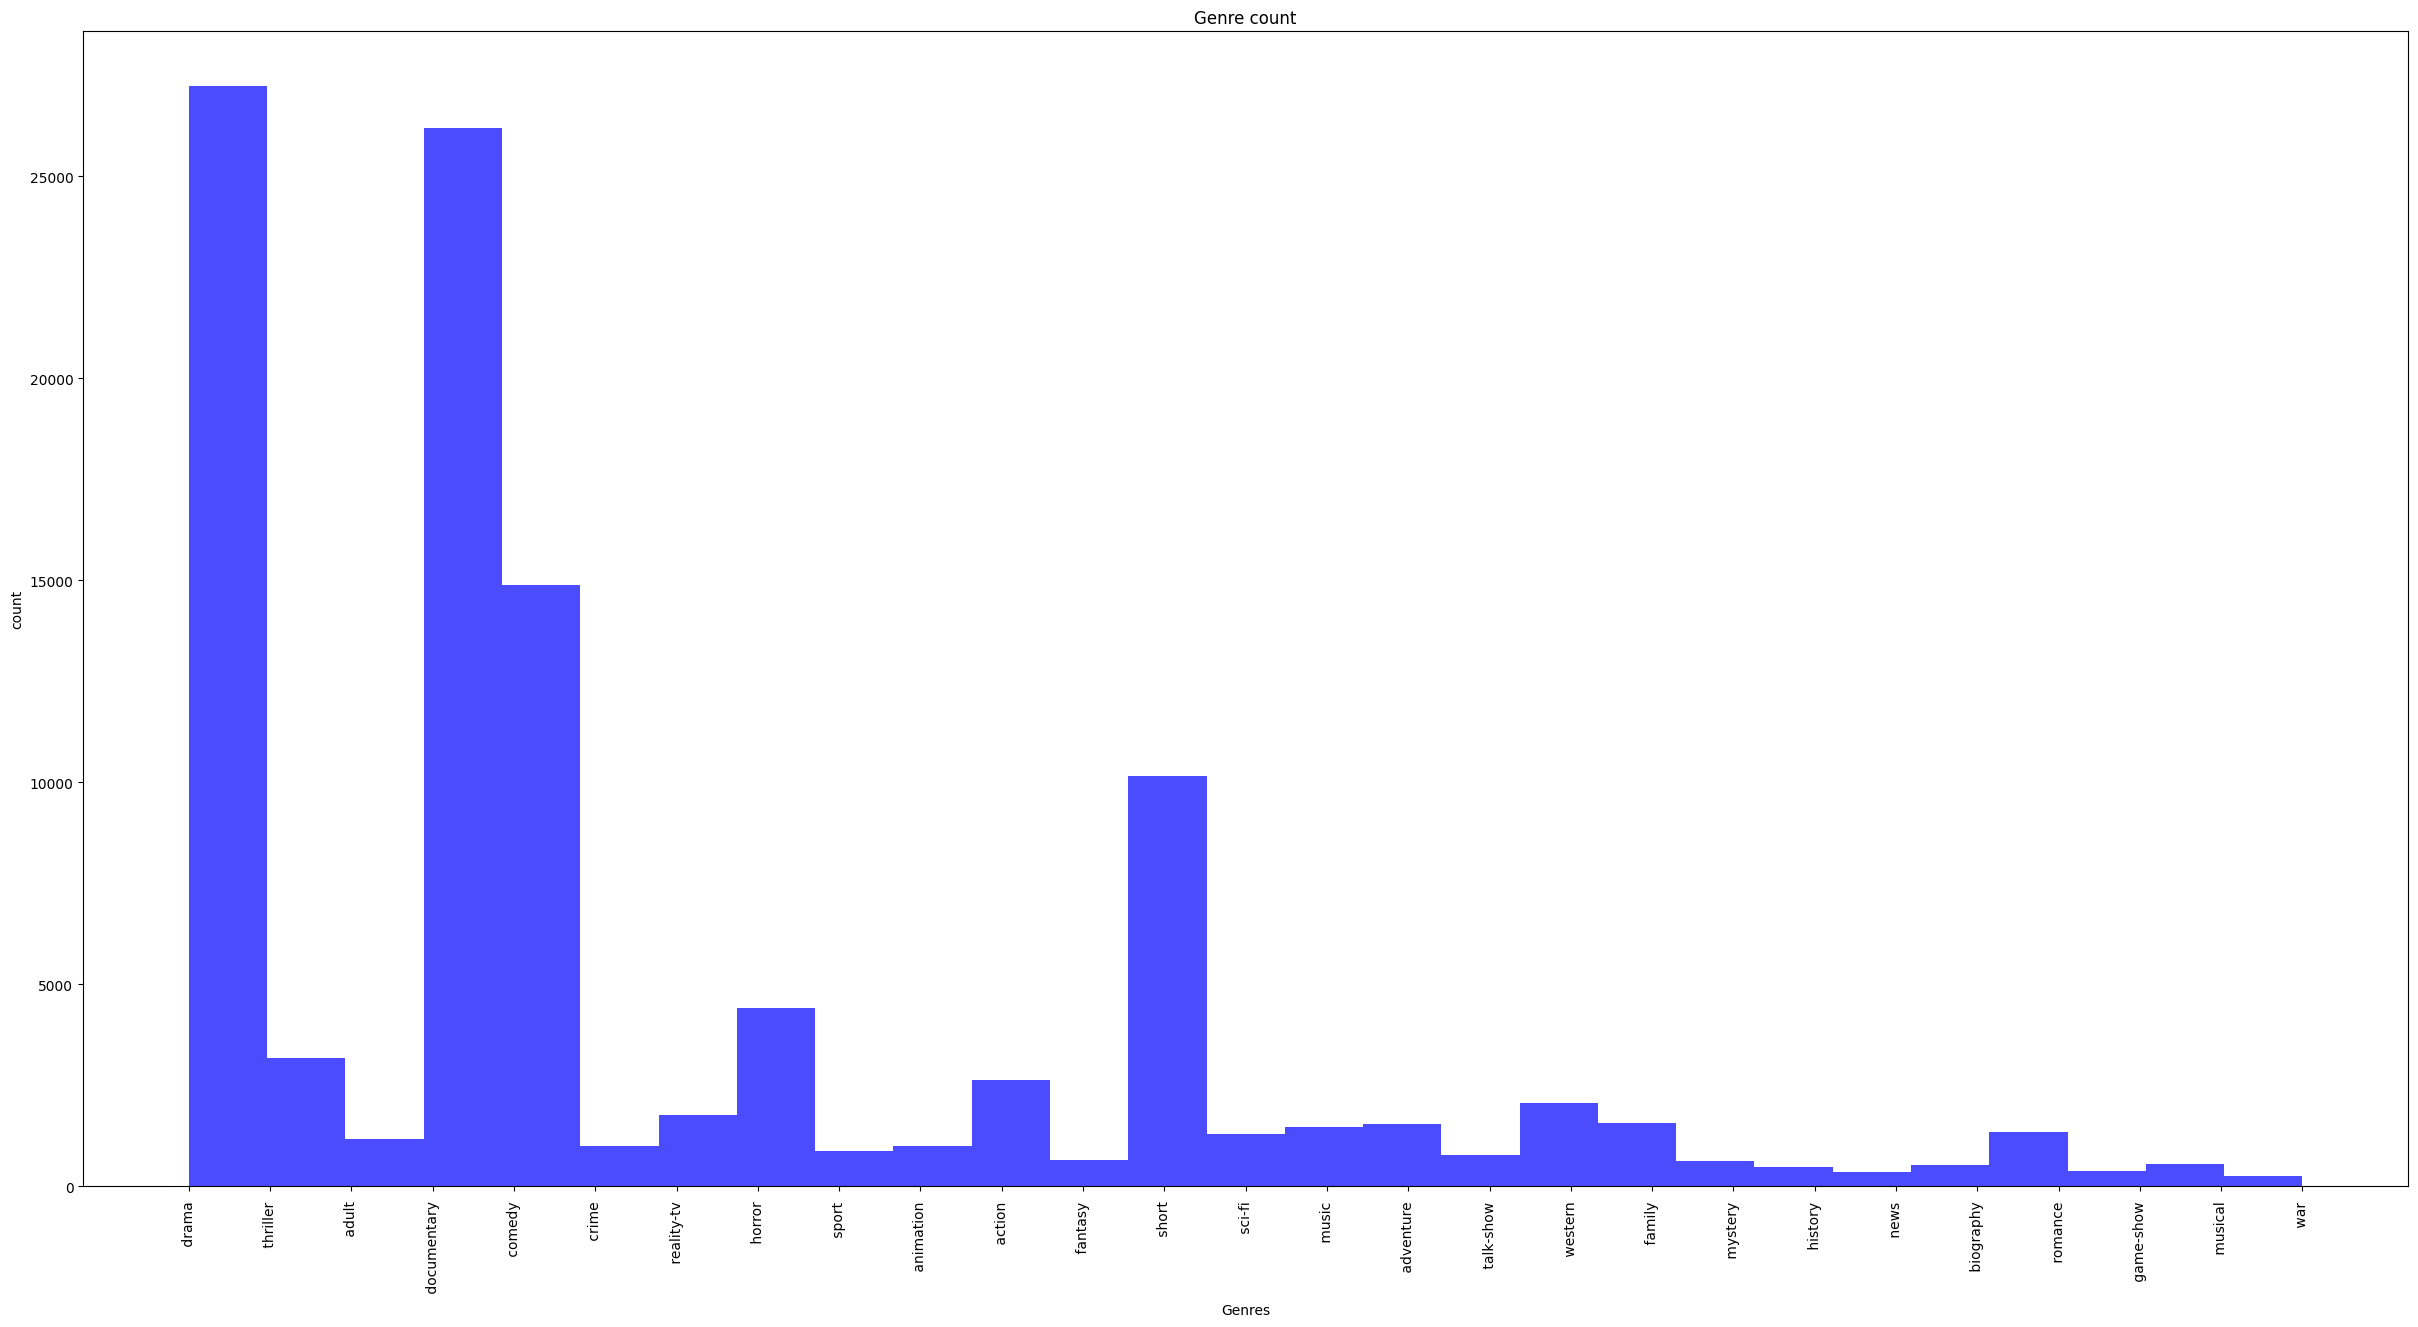

In [21]:
# Create a histogram of genre distribution
plt.figure(figsize=(30, 15))
plt.hist(df["Genre"],bins =27 , color='blue', alpha=0.7)
plt.title("Genre count")
plt.xlabel("Genres")
plt.ylabel("count")
plt.xticks(rotation=90)
plt.show()

In [22]:
#Convert sentiment labels to numerical values for modeling
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df['Genre_labencode'] = label_encoder.fit_transform(df['Genre'])
df['Genre_labencode']

class_labeles= list(label_encoder.classes_)
class_labeles   

[' action ',
 ' adult ',
 ' adventure ',
 ' animation ',
 ' biography ',
 ' comedy ',
 ' crime ',
 ' documentary ',
 ' drama ',
 ' family ',
 ' fantasy ',
 ' game-show ',
 ' history ',
 ' horror ',
 ' music ',
 ' musical ',
 ' mystery ',
 ' news ',
 ' reality-tv ',
 ' romance ',
 ' sci-fi ',
 ' short ',
 ' sport ',
 ' talk-show ',
 ' thriller ',
 ' war ',
 ' western ']

In [23]:
df.head()

,id,Name,Genre,Description,Despcription_processing,Genre_labencode
0,1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...,listening conversation doctor parents 10yearol...,8
1,2,Cupid (1997),thriller,A brother and sister with a past incestuous r...,brother sister past incestuous relationship cu...,24
2,3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...,bus empties students field trip museum natural...,1
3,4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...,help unemployed father make ends meet edith tw...,8
4,5,The Unrecovered (2007),drama,The film's title refers not only to the un-re...,films title refers unrecovered bodies ground z...,8


In [24]:
# Separating features and Target
x = df["Despcription_processing"]
y = df["Genre"]


# Spliting training and test data

In [25]:
x_train ,x_test ,y_train ,y_test = train_test_split(x ,y ,test_size = 0.3, random_state=2)

# Model Training

In [26]:
#Create a TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer()  

# Fit and transform the TF-IDF vectorizer on the training data
X_train_tfidf = tfidf_vectorizer.fit_transform(x_train)

# Transform the test data using the same vectorizer
X_test_tfidf = tfidf_vectorizer.transform(x_test)


# MultinomialNB

In [27]:
mnb = MultinomialNB()
mnb.fit(X_train_tfidf ,y_train)
print("Model Score on Training data",mnb.score(X_train_tfidf ,y_train))
print("Model Score on Training data",mnb.score(X_test_tfidf ,y_test))
y_pred = mnb.predict(X_test_tfidf)
print(classification_report(y_pred ,y_test))

Model Score on Training data 0.4695937487646431
Model Score on Training data 0.44006149116064563
               precision    recall  f1-score   support

      action        0.00      0.00      0.00         0
       adult        0.00      0.00      0.00         0
   adventure        0.00      0.00      0.00         0
   animation        0.00      0.00      0.00         0
   biography        0.00      0.00      0.00         0
      comedy        0.04      0.72      0.07       240
       crime        0.00      0.00      0.00         0
 documentary        0.90      0.53      0.67     13127
       drama        0.88      0.37      0.52     19147
      family        0.00      0.00      0.00         0
     fantasy        0.00      0.00      0.00         0
   game-show        0.00      0.00      0.00         0
     history        0.00      0.00      0.00         0
      horror        0.00      0.00      0.00         0
       music        0.00      0.00      0.00         0
     musical        0.

# LogisticRegression

In [28]:
model = LogisticRegression()
model.fit(X_train_tfidf ,y_train)

LogisticRegression()

In [29]:
# predictions model
y_pred = model.predict(X_test_tfidf)


In [30]:
# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# print a classification report 
print(classification_report(y_test, y_pred))

Accuracy: 0.60
               precision    recall  f1-score   support

      action        0.52      0.30      0.38       807
       adult        0.76      0.27      0.40       384
   adventure        0.54      0.19      0.28       454
   animation        0.77      0.03      0.06       331
   biography        0.00      0.00      0.00       140
      comedy        0.55      0.62      0.58      4503
       crime        0.28      0.02      0.04       320
 documentary        0.69      0.86      0.77      7799
       drama        0.56      0.78      0.65      8052
      family        0.46      0.11      0.17       489
     fantasy        0.42      0.03      0.05       190
   game-show        0.89      0.50      0.64       117
     history        0.00      0.00      0.00       139
      horror        0.67      0.61      0.64      1392
       music        0.67      0.56      0.61       445
     musical        0.00      0.00      0.00       159
     mystery        0.00      0.00      0.00     